In [12]:
import os
from fnmatch import fnmatch
import pandas as pd
import re
import tqdm
import plotnine as p9
import patchworklib as pw

In [38]:
def dict_from_path(path: str):
    params_name_pattern = "([a-zA-Z]*)-"
    param_names = [path[m.start():m.end()-1] for m in re.finditer(params_name_pattern, path)]
    dict = {}
    for param in param_names:
        dict[param] = 0
    return dict

In [39]:
def construct_regex_string(path: str, names: dict):
    res: str = ""
    last_key = list(names.keys())[-1]
    for key in list(names.keys()):
        res = res + key + "-([0-9.]*)"
        if key != last_key:
            res = res + '_'
    return res

In [40]:
def extract_parms(filepath: str):
    param_st = filepath.split('/')[-2]
    params = dict_from_path(param_st)
    regex_str = construct_regex_string(param_st, params)
    result = re.search(regex_str, param_st)
    keys = list(params.keys())
    for x, key in enumerate(keys):
        params[key] = float(result.group(x+1))
    return params

In [41]:
root = os.path.join(os.getcwd(),'output')
pattern = "logger_2.csv"
file_paths = []
dfs = []

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            file_path = os.path.join(path, name)
            file_paths.append(file_path)
            df = pd.read_csv(file_path, sep='\t')
            params = extract_parms(file_path)
            for key in list(params.keys()):
                df[key] = params[key]
            dfs.append(df)

In [50]:
sim = pd.concat(dfs)
sim = sim[sim['time'] >= 10]
sim['cv_cat'] = sim['cv'].astype("category")

In [51]:
sim.describe()

,time,celltype.target.size,celltype.infected.size,DV,bcf,cV,pi,rhoi,cv
count,33128.000000,33128.000000,33128.000000,33128.000000,33128.000000,3608.000000,3608.000000,29520.000000,29520.00000
mean,30.000000,39.432806,10.567194,0.493317,0.300656,0.501258,0.535320,0.332000,0.41250
std,11.832338,17.442844,17.442844,0.335459,0.364459,0.276414,0.272999,0.377228,0.38141
min,10.000000,0.000000,1.000000,0.000000,0.001000,0.076378,0.019558,0.010000,0.05000
25%,20.000000,42.000000,1.000000,0.200000,0.010000,0.272191,0.303587,0.050000,0.08750
50%,30.000000,49.000000,1.000000,0.400000,0.100000,0.469845,0.569843,0.100000,0.30000
75%,40.000000,49.000000,8.000000,0.800000,0.500000,0.744626,0.769347,0.500000,0.62500
max,50.000000,49.000000,50.000000,1.000000,1.000000,0.997927,0.968217,1.000000,1.00000


In [52]:
sim['cv_cat']

10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
     ... 
46    1.0
47    1.0
48    1.0
49    1.0
50    1.0
Name: cv_cat, Length: 33128, dtype: category
Categories (4, float64): [0.05, 0.10, 0.50, 1.00]

In [49]:
plots = []
for dv in sim['DV'].unique():
    plot = (p9.ggplot(sim[sim['DV'] == dv], p9.aes(x='time', color='cv_cat'))
            + p9.geom_line(p9.aes(y='celltype.infected.size'))
            + p9.facet_grid('bcf ~ rhoi', labeller = 'label_both')
            + p9.labs(title="DV: " + str(dv))
            )
    plots.append(pw.load_ggplot(plot))
print("nr of plots: " + str(len(sim['DV'].unique())))

IndexError: index 120 is out of bounds for axis 0 with size 120

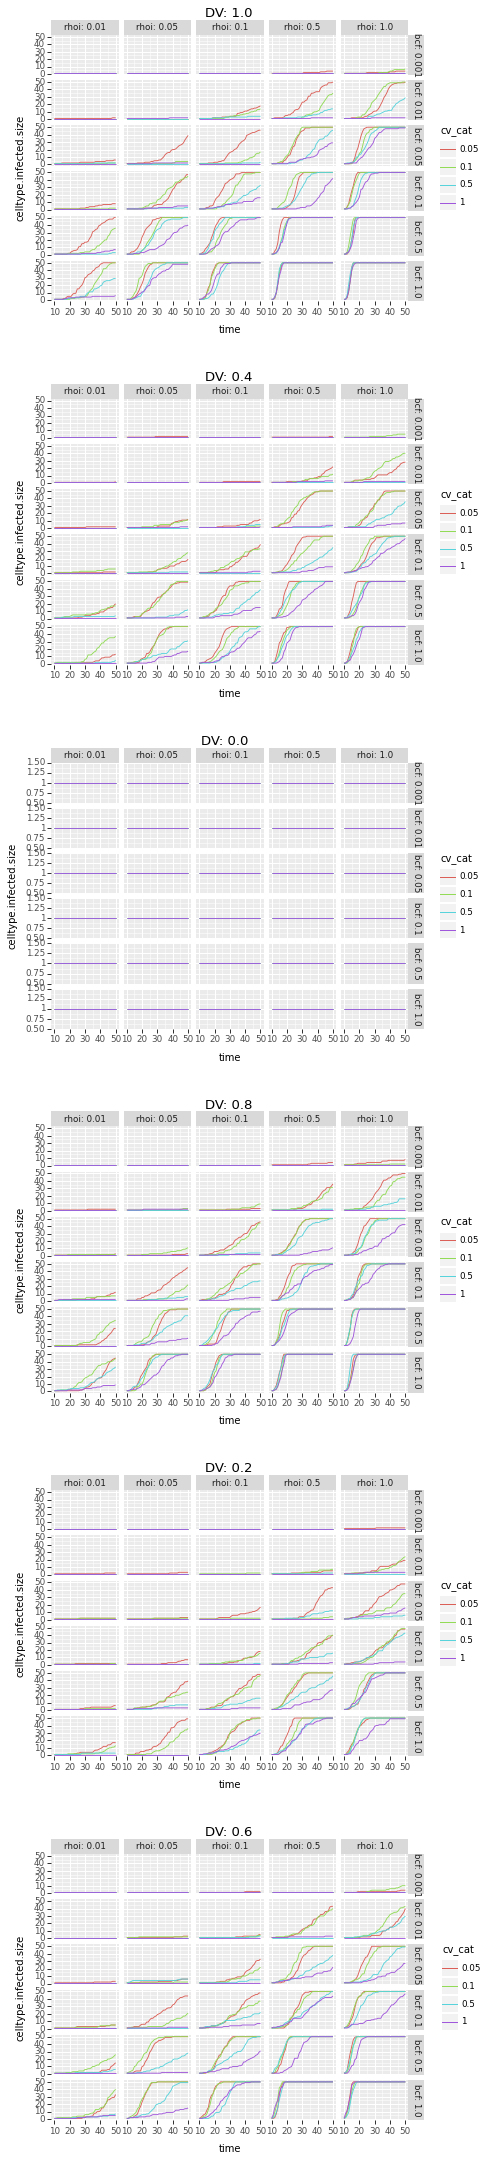

In [23]:
figure = plots[0]/plots[1]/plots[2]/plots[3]/plots[4]/plots[5]
figure.savefig()

In [26]:
sim[sim['DV'] == 0.2]

,time,celltype.target.size,celltype.infected.size,DV,bcf,rhoi,cv
0,0,49,1,0.2,0.10,0.50,1.00
1,1,49,1,0.2,0.10,0.50,1.00
2,2,49,1,0.2,0.10,0.50,1.00
3,3,49,1,0.2,0.10,0.50,1.00
4,4,49,1,0.2,0.10,0.50,1.00
...,...,...,...,...,...,...,...
46,46,48,2,0.2,0.05,0.01,0.05
47,47,48,2,0.2,0.05,0.01,0.05
48,48,48,2,0.2,0.05,0.01,0.05
49,49,48,2,0.2,0.05,0.01,0.05


In [36]:
sim.query('DV==0.2 & cv==0.1 & bcf==0.1 & rhoi==0.1')
simDV2 = sim[sim['DV'] == 0.2]
simDV2['cv_cat'] = simDV2['cv'].astype("category")

,time,celltype.target.size,celltype.infected.size,DV,bcf,rhoi,cv
0,0,49,1,0.2,0.1,0.1,0.1
1,1,49,1,0.2,0.1,0.1,0.1
2,2,49,1,0.2,0.1,0.1,0.1
3,3,49,1,0.2,0.1,0.1,0.1
4,4,49,1,0.2,0.1,0.1,0.1
5,5,49,1,0.2,0.1,0.1,0.1
6,6,49,1,0.2,0.1,0.1,0.1
7,7,49,1,0.2,0.1,0.1,0.1
8,8,49,1,0.2,0.1,0.1,0.1
9,9,49,1,0.2,0.1,0.1,0.1
